In [1]:
%load_ext autotime
%load_ext autoreload
%autoreload 2

In [3]:
import torch
print(torch.__version__)
print(torch.cuda.is_available())
import matplotlib.pyplot as plt
import sunRay.SunRayRunAnisScat as anisRay
import numpy as np
#plotly 3d check

1.5.0
True
time: 557 ms


In [69]:
import sunRay.SunRayRunAnisScat as anisRay
import sunRay.statisticalRays as raystat
photon_N=6000
(steps_N  ,  collect_N,  photon_N, start_r,  start_theta, 
            start_phi,  f_ratio, epsilon ,  anis, asym,  omega0, freq0, 
            t_collect, tau, r_vec_collect_local,  k_vec_collect_local,  tau_collect_local
            ) = anisRay.runRays(steps_N  = 5000 , collect_N = 150, t_param = 20.0, 
            photon_N = photon_N,
            start_r = 1.75, start_theta = -1e-14/180.0*np.pi,    start_phi  = 0/180.0*np.pi,
            f_ratio  = 1.1,  epsilon = 0.1, anis = 1,
            asym = 1.0, Te = 86.0, Scat_include = True, Show_param = True,
            Show_result_k = False, Show_result_r = False,  verb_out = True,
            sphere_gen = False, num_thread =2, early_cut= True ,
            save_npz = False,ignore_down=True,Absorb_include=True)

----------------------------------
Frequency : 35.045MHz
Compute with : cpu
----------------------------------
100%|██████████| 5000/5000 [01:23<00:00, 59.92it/s]Traced final t : 163.23552 s
time: 1min 24s



(-76.18694496154785, 74.70977973937988, -23.018638801574706, 76.00528354644776)

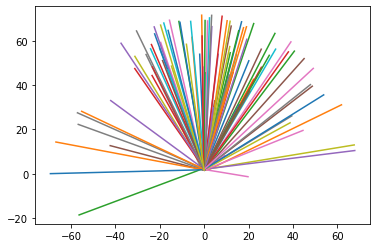

time: 643 ms


In [70]:
plt.plot(r_vec_collect_local[:,0,1:100],r_vec_collect_local[:,2,1:100])
ax = plt.gca()
ax.axis('equal')

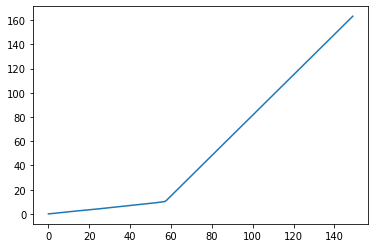

time: 473 ms


In [71]:
plt.plot(t_collect)

In [72]:
(r_vec_stat_avail,k_vec_stat_avail,t_reach_stat_avail,tau_stat_avail,
            r_vec_0, k_vec_0) =  raystat.reduct_lv1(
                photon_N,r_vec_collect_local,k_vec_collect_local,
                t_collect,tau_collect_local,omega0,num_t_bins=60)

time: 986 ms


In [73]:
ang_rot = 0

# Important !!! rotate the initial point
r_vec_rot,k_vec_rot = raystat.rotateCoordKX(r_vec_stat_avail,k_vec_stat_avail,-ang_rot*np.pi/180)
r_vec0_rot,k_vec0_rot = raystat.rotateCoordKX(r_vec_0,k_vec_0,-ang_rot*np.pi/180)

(x_im_stat,y_im_stat,t_reach_1au_stat,weights_stat,t_free_stat
    )=raystat.ImgXYtEstimate(r_vec_rot,k_vec_rot,t_reach_stat_avail,
            tau_stat_avail,r_vec0_rot, k_vec0_rot,num_t_bins=60)

time: 202 ms


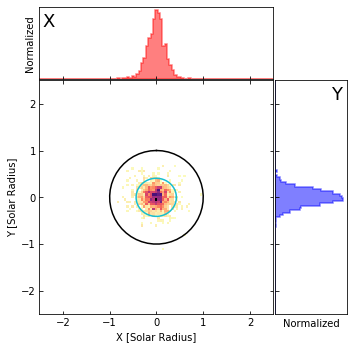

time: 1.15 s


In [74]:


#(x_im_stat,y_im_stat,t_reach_1au_stat,weights_stat,t_free_stat
#    )=raystat.ImgXYtEstimate(r_vec_stat_avail,k_vec_stat_avail,t_reach_stat_avail,
#            tau_stat_avail,r_vec_0, k_vec_0,num_t_bins=60)

from sunRay.showPlot import XYDistributionImageHist

XYDistributionImageHist(x_im_stat,y_im_stat,bins_data=np.linspace(-2.5,2.5,100)
            ,weights_data=weights_stat)

0.30175685505170446


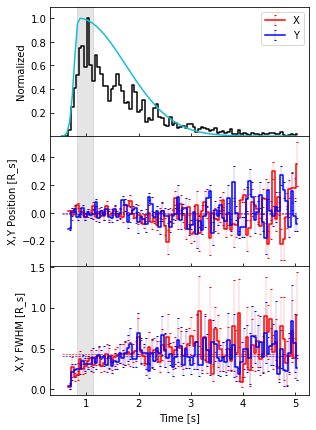

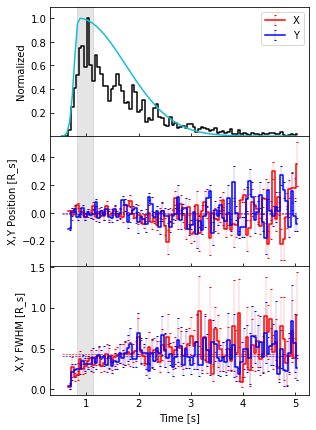

time: 3.23 s


In [78]:
from sunRay.showPlot import XYVariationPlot

XYVariationPlot(x_im_stat,y_im_stat,t_reach_1au_stat,weights_stat,t_step = 0.05)

In [76]:
x_im_stat.dtype

dtype('float64')

time: 161 ms


In [ ]:
torch.sort(tau)[0][0]

In [49]:

t_collect

tensor([4.4008e-04, 1.5403e-02, 2.9925e-02, 4.4888e-02, 5.9410e-02, 7.4373e-02,
        8.8895e-02, 1.0386e-01, 1.1838e-01, 1.3334e-01, 1.4831e-01, 1.6283e-01,
        1.7779e-01, 1.9231e-01, 2.0728e-01, 2.2180e-01, 2.3706e-01, 2.5231e-01,
        2.6864e-01, 2.8506e-01, 3.0366e-01, 3.2405e-01, 3.4565e-01, 3.6915e-01,
        3.9385e-01, 4.2297e-01, 4.5586e-01, 4.9590e-01, 5.4317e-01, 6.0406e-01,
        6.8098e-01, 7.8152e-01, 9.4278e-01, 1.2286e+00, 2.3544e+00, 3.9940e+00,
        5.6832e+00, 7.3228e+00, 9.0120e+00, 1.0652e+01, 1.2341e+01, 1.4030e+01,
        1.5670e+01, 1.7359e+01, 1.8998e+01, 2.0688e+01, 2.2327e+01, 2.4016e+01,
        2.5656e+01, 2.7345e+01, 2.9034e+01, 3.0674e+01, 3.2363e+01, 3.4003e+01,
        3.5692e+01, 3.7331e+01, 3.9020e+01, 4.0660e+01, 4.2349e+01, 4.3989e+01,
        4.5678e+01, 4.7367e+01, 4.9007e+01, 5.0696e+01, 5.2335e+01, 5.4025e+01,
        5.5664e+01, 5.7353e+01, 5.8993e+01, 6.0682e+01, 6.2371e+01, 6.4011e+01,
        6.5700e+01, 6.7340e+01, 6.9029e+

time: 158 ms


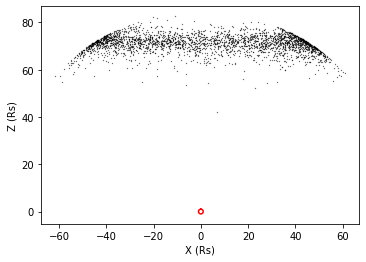

time: 847 ms


In [66]:
# plot the position in process
idx = -1
idx_select = np.sqrt(np.sum(r_vec_collect_local**2,axis=1)[-1,:])<84.7
plt.plot(r_vec_collect_local[idx,0,idx_select],r_vec_collect_local[idx,2,idx_select],'k.',markersize=0.5)
plt.plot(np.sin(np.linspace(0,np.pi*2,300)),
        np.cos(np.linspace(0,np.pi*2,300)),'r')
plt.xlabel('X (Rs)')
plt.ylabel('Z (Rs)')
plt.gca().set_aspect('equal')

In [53]:
idx_select=[np.sqrt(np.sum(r_vec_collect_local**2,axis=1)[-1,:])>84]

array([ True,  True,  True, ...,  True,  True,  True])

time: 167 ms


In [ ]:
# plot ray

idx_select = np.nonzero(((r_vec_collect_local[-1,0,:])**2+r_vec_collect_local[-1,1,:]**2)>0.5)
for num in (idx_select):
        plt.plot(r_vec_collect_local[:,2,num],r_vec_collect_local[:,0,num])
        plt.gca().set_aspect('equal')

In [ ]:
# inspect ray 
idx_select = np.nonzero(((r_vec_collect_local[-1,1,:])**2+r_vec_collect_local[-1,2,:]**2)<0.2)

idx_select = np.nonzero(((torch.sum(r_vec_collect[0,:,:].reshape(-1,3)*k_vec_collect[0,:,:].reshape(-1,3),1))).cpu()>1000)
#hst = plt.hist(k_vec_collect_local[0,:,idx_select])

#hst=plt.hist(torch.sum(r_vec_collect[99,:,idx_select].reshape(-1,3)*k_vec_collect[99,:,idx_select].reshape(-1,3),1).cpu().data.numpy(),100)
print(len(idx_select))
plt.plot(r_vec_collect_local[-1,0,idx_select],r_vec_collect_local[-1,2,idx_select],'k.',markersize=0.5)
plt.plot(np.sin(np.linspace(0,np.pi*2,300)),
        np.cos(np.linspace(0,np.pi*2,300)),'r')
plt.xlabel('X (Rs)')
plt.ylabel('Z (Rs)')
plt.gca().set_aspect('equal')

In [ ]:
idx_select = np.nonzero(((r_vec_collect_local[-1,1,:])**2+r_vec_collect_local[-1,2,:]**2)>1)

#hst=plt.hist(((torch.sum(r_vec_collect[0,:,:].reshape(-1,3)*k_vec_collect[0,:,:].reshape(-1,3),1))).numpy(),100)

hst=plt.hist(((torch.sum(r_vec[:,idx_select]*k_vec[:,idx_select],axis=0)).view(-1)).cpu().numpy(),500)

In [ ]:
hst=plt.hist(((torch.sum(r_vec.cpu()[:,:]*k_vec.cpu()[:,:],axis=0))).numpy(),100)

In [ ]:
plt.plot(k_vec_collect[0,0,:],k_vec_collect[0,1,:],'k.')

In [ ]:
freq = pfreq.omega_pe_r(ne_r,torch.Tensor(np.linspace(2,50,400)).to(dev_u))/(2*PI)

In [ ]:
cProfile.run('exec(open("sunRay_v0.py").read())')

In [ ]:
kc_cur/kc_norm

In [ ]:
t_collect.shape

In [ ]:
plt.plot(k_vec_collect[:,0,0],k_vec_collect[:,0,1],'k.')

In [ ]:
for num in range(100):
    plt.plot(r_vec_collect[:,2,num],r_vec_collect[:,1,num])
    plt.axis('equal')

In [ ]:
amp = lambda x : torch.sqrt(torch.sum(x.pow(2),axis=0))

plt.plot(amp(r_vec),amp(domega_pe_dxyz),'k.')

In [ ]:
domega_pe_dr.repeat(3,1).shape

In [ ]:
pfreq.omega_pe_r(ne_r,rr_cur)[0]

In [ ]:
rr_test = torch.linspace(20,100,100)
plt.plot(rr_test,pfreq.omega_pe_r(ne_r,rr_test))


In [ ]:
rr_cur

In [ ]:
start_r

In [ ]:
r_vec_collect.shape[2]

In [ ]:
# a test for the transformation

In [ ]:
# rotate the k vec into the r-z coordinate
kcx = - kx_cur*torch.sin(fi) + ky_cur*torch.cos(fi) 
kcy = (- kx_cur*costheta*torch.cos(fi) 
    - ky_cur*costheta*torch.sin(fi) + kz_cur*sintheta) 
kcz = (  kx_cur*sintheta*torch.cos(fi) 
    + ky_cur*sintheta*torch.sin(fi) + kz_cur*costheta)


kx_cur1 = (-kcx*torch.sin(fi) 
    -kcy*costheta*torch.cos(fi) +kcz*sintheta*torch.cos(fi) )
ky_cur1 = ( kcx*torch.cos(fi) 
    -kcy*costheta*torch.sin(fi) +kcz*sintheta*torch.sin(fi) )
kz_cur1 =  kcy*sintheta+kcz*costheta


In [ ]:
torch.max(kz_cur1/kz_cur-1)

In [ ]:
torch.atan(torch.Tensor([2]))

In [ ]:
plt.hist(torch.sum(r_vec*k_vec,0).cpu())

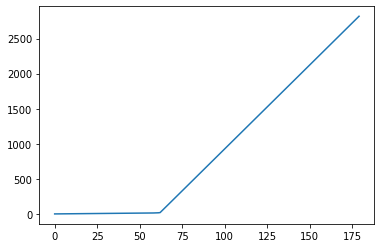

time: 479 ms


In [8]:
plt.plot(np.array(np.array(t_collect)))

In [58]:
np.savez('sunray_small_float32_20deg_0.3_0.1.npz', steps_N  = steps_N, collect_N = collect_N,
    photon_N = photon_N, start_r = start_r, start_theta = start_theta,
    start_phi  = start_phi, f_ratio  = f_ratio, epsilon = epsilon ,
    anis = anis, asym = asym,
    omega0=omega0.cpu(),
    freq0=freq0.cpu(),
    t_collect=t_collect.cpu(), tau=tau.cpu(),
    r_vec_collect_local=r_vec_collect_local,
    k_vec_collect_local=k_vec_collect_local,
    tau_collect_local = tau_collect_local)

time: 324 ms


torch.return_types.sort(
values=tensor([390.1856, 390.6868, 390.8470,  ..., 393.6197, 393.6219, 393.6273]),
indices=tensor([ 915, 3975, 3049,  ..., 1773,  250, 4476]))

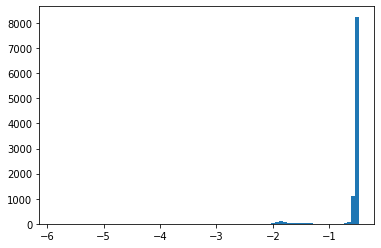

time: 648 ms


In [7]:
hst=plt.hist((-tau.cpu()),80)
torch.sort(rr_cur)

0.19202512404830618


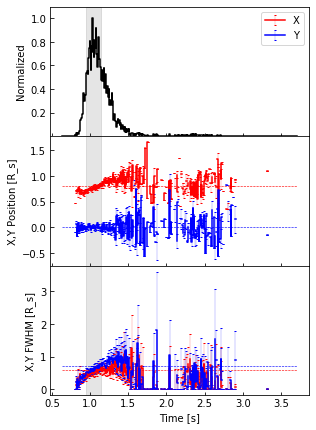

time: 2.17 s


In [8]:
from sunRay.showPlot import XYVariationPlot
gcf=XYVariationPlot(x_im_stat,y_im_stat,t_reach_stat,weights_stat,t_step = 0.008)

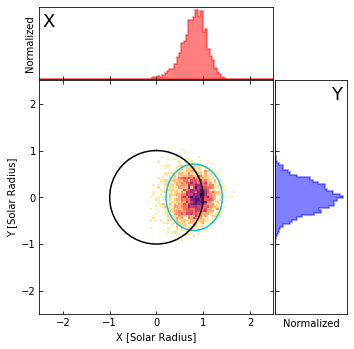

time: 1.14 s


In [9]:



from sunRay.showPlot import XYDistributionImageHist

XYDistributionImageHist(x_im_stat,y_im_stat,bins_data=np.linspace(-2.5,2.5,100)
            ,weights_data=weights_stat)

In [20]:
r_vec

tensor([[-17.6898, -10.5367,  14.8671,  ...,  39.0303,  31.4664,      nan],
        [  2.4447,  -9.2189, -19.9277,  ...,   6.3433, -31.0992,      nan],
        [ 46.2711,  47.4065,  42.8635,  ...,  30.7063,  22.0096,      nan]],
       device='cuda:0')

time: 29 ms


In [64]:
print(np.sqrt(np.sum((r_vec_collect_local[0,:,140])**2)))
        

1.7500131
time: 120 ms


In [12]:
import sunRay.tool as stool

print(stool.R_to_freq(1.75,1.1))
print(stool.R_to_freq(2.10428659,2))

stool.freq_to_R(35045076,2)

tensor([35045076.])
tensor([35045072.])


array([2.10428659])

time: 138 ms
